### In this notebook we will see how changing the problem of multi-classification into a simple binary classification affects the accuracy of a Logistic Regression Model

In this notebook, we will generate two labels 0 for not having diabetic retinopathy and 1 for having diabetic retinopathy. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

np.random.seed(17)

In [10]:
root_path = r"C:/Users/gai3p/Downloads/retinaldiabetes/"
images_path = root_path + "gaussian_filtered_images/gaussian_filtered_images/"
images = []
Y = []

dir_names = [dir_name for dir_name in os.listdir(images_path) if os.path.isdir(images_path + dir_name)]
print(os.listdir(images_path))
for dir_name in dir_names:
    if dir_name == "No_DR": # Create a label
        y = 0 
    else:
        y = 1
    for file_name in os.listdir(images_path + dir_name):
        images.append(plt.imread(images_path + dir_name + "/" + file_name))
        Y.append(y)
    print("Finish reading " + dir_name + " condition images.")
    print("Total image read: " + str(len(images)))
print("End of the data")
Y = np.array(Y)

['export.pkl', 'Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']
Finish reading Mild condition images.
Total image read: 370
Finish reading Moderate condition images.
Total image read: 1369
Finish reading No_DR condition images.
Total image read: 3174
Finish reading Proliferate_DR condition images.
Total image read: 3469
Finish reading Severe condition images.
Total image read: 3662
End of the data


Size of each image: (224, 224, 3)
Size of labels: (1, 3662)
Number of DR (y = 1): 1857
Number of No_DR (y = 0): 1805


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


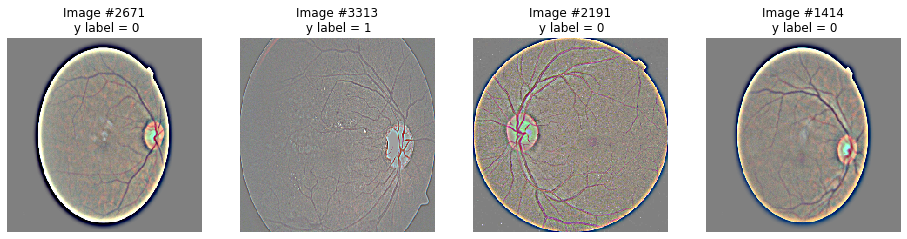

In [4]:
print("Size of each image: " + str(images[0].shape))
print("Size of labels: " + str(Y.shape))
print("Number of DR (y = 1): " + str(np.sum(Y)))
print("Number of No_DR (y = 0): " + str(Y.shape[1] - np.sum(Y)))

# Randomly show images
n = 4 # show 4 images
fig, axes = plt.subplots(nrows = 1, ncols = n, figsize=(16, 16))
rand_idx = np.random.randint(0, len(images), n)
for i in range(n):
    axes[i].imshow(images[rand_idx[i]])
    axes[i].title.set_text("Image #" + str(rand_idx[i]) + "\n y label = " + str(Y[0][rand_idx[i]]))
    axes[i].axis("off")
fig.show()

Size of each grayscale image: (224, 224)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


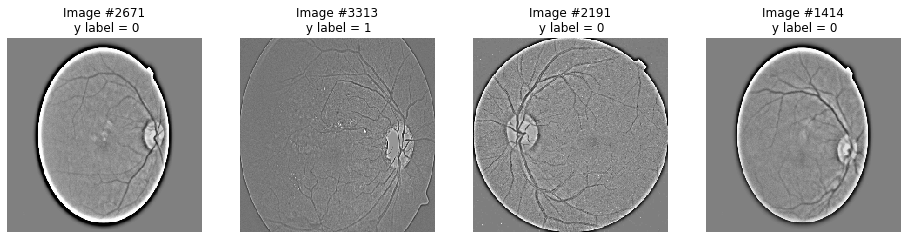

In [5]:
#preprocessing the data 

def rgb_to_gray(image):
    rgb_weights = [0.2989, 0.5870, 0.1140]
    return np.dot(image, rgb_weights)

gray_images = list(map(rgb_to_gray, images)) # Convert RGB images to grayscale images

# Print the image size
print("Size of each grayscale image: " + str(gray_images[0].shape))

# Show grayscale images
fig, axes = plt.subplots(nrows = 1, ncols = n, figsize=(16, 16))
for i in range(n):
    axes[i].imshow(gray_images[rand_idx[i]], cmap='gray')
    axes[i].title.set_text("Image #" + str(rand_idx[i]) + "\n y label = " + str(Y[0][rand_idx[i]]))
    axes[i].axis("off")
fig.show()

In [11]:
#converting to an array
X = np.array(gray_images)
nsamples, nx, ny = X.shape
X_reshaped = X.reshape((nsamples,nx*ny))
print("Size of resized data set (n_x, m): " + str(X_reshaped.shape))
print("Size of label (m, ): " + str(Y.shape))

Size of resized data set (n_x, m): (3662, 50176)
Size of label (m, ): (3662,)


In [12]:
X_reshaped.shape

(3662, 50176)

In [13]:
Y.shape

(3662,)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_reshaped, Y, test_size = 0.25, random_state = 5)

In [15]:
classifier = LogisticRegression().fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In the below cell, we can see that the accuracy of the Logistic Regression model is 95% with no filters applied

In [16]:
print("The accuracy of the basic Logistic Regression is:", round(accuracy_score(Y_test, Y_pred) * 100), '%')

The accuracy of the basic Logistic Regression is: 95.0 %


## Applying Laplacian of Gaussian as a preprocessing step

In [17]:
import scipy.ndimage
from scipy.misc import imresize
import scipy 
import seaborn as sns

import cv2

In [18]:
# LoG (Smooth) Function
data_array = []

for x in range(len(X)):
    s = 1.75
    temp = scipy.ndimage.filters.gaussian_filter(
        X[x,:,:],
        sigma = s
        )
    
    lap_kernel = np.array([
        [0,1,0],
        [1,-4,1],
        [0,1,0]
    ])
    result = cv2.filter2D(temp,-1,lap_kernel)
    data_array.append(result)

In [19]:
data_array_sized = np.array(data_array)

In [20]:
data_array_sized.shape

(3662, 224, 224)

In [21]:
nsamples, nx, ny = data_array_sized.shape
data_array_reshaped = data_array_sized.reshape((nsamples,nx*ny))

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(data_array_reshaped, Y, test_size = 0.25, random_state = 5)

In [23]:
classifier = LogisticRegression().fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
print("The accuracy of Logistic Regression with LoG applied is:", round(accuracy_score(Y_test, Y_pred) * 100), '%')

The accuracy of Logistic Regression with LoG applied is: 94.0 %


We can see the classification report for Logistic Regression when Laplacian of Gaussian function is applied as a preprocessing step. We are getting an accuracy of 94%. This model would be particularly useful when patients need to be screened just on the basis of having or not having diabetic retinopathy

In [25]:
from sklearn.metrics import classification_report

print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       446
           1       0.94      0.93      0.94       470

    accuracy                           0.94       916
   macro avg       0.94      0.94      0.94       916
weighted avg       0.94      0.94      0.94       916



Reference - https://www.kaggle.com/cherngs/deep-learning-01-logistic-regression